In [25]:
def load_data(filename):
    x_vals = []
    y_vals = []
    with open(filename, 'r') as file:
        for line in file:
            parts = line.strip().split(',')
            x_vals.append(float(parts[0]))
            y_vals.append(float(parts[1]))
    return x_vals, y_vals

In [ ]:
def compute_loss(x_vals, y_vals, w0, w1):
    N = len(x_vals)
    total = 0.0
    for i in range(N):
        y_pred = w1 * x_vals[i] + w0
        total += (y_pred - y_vals[i]) ** 2
    return 0.5 * total / N

def linear_regression(x_vals, y_vals, lr=0.0001, threshold=1e-3, max_iter=10000):
    w0, w1 = 0.0, 1.0
    N = len(x_vals)

    for it in range(max_iter):
        dw0 = 0.0
        dw1 = 0.0
        for i in range(N):
            error = (w1 * x_vals[i] + w0) - y_vals[i]
            dw0 += error
            dw1 += error * x_vals[i]
        dw0 /= N
        dw1 /= N

        w0 -= lr * dw0
        w1 -= lr * dw1

        loss = compute_loss(x_vals, y_vals, w0, w1)

        if it % 100 == 0:
            print(f"Iter {it}: w0 = {w0:.4f}, w1 = {w1:.4f}, loss = {loss:.4f}")

        if loss < threshold:
            break
    return w0, w1

In [27]:
x_vals, y_vals = load_data('dummy.csv')
print(x_vals, y_vals)
w0, w1 = linear_regression(x_vals, y_vals)

print(f"\nFinal weights: w0 = {w0}, w1 = {w1}")

[10.0, 20.0, 40.0, 60.0, 80.0] [55.0, 80.0, 100.0, 120.0, 150.0]
Iter 0: w0 = 0.0059, w1 = 1.2650, loss = 1154.9398
Iter 100: w0 = 0.1501, w1 = 2.0925, loss = 319.6206
Iter 200: w0 = 0.2796, w1 = 2.0903, loss = 317.9440
Iter 300: w0 = 0.4087, w1 = 2.0880, loss = 316.2765
Iter 400: w0 = 0.5375, w1 = 2.0858, loss = 314.6180
Iter 500: w0 = 0.6659, w1 = 2.0836, loss = 312.9685
Iter 600: w0 = 0.7939, w1 = 2.0814, loss = 311.3279
Iter 700: w0 = 0.9217, w1 = 2.0791, loss = 309.6962
Iter 800: w0 = 1.0490, w1 = 2.0769, loss = 308.0733
Iter 900: w0 = 1.1761, w1 = 2.0747, loss = 306.4592
Iter 1000: w0 = 1.3027, w1 = 2.0725, loss = 304.8538
Iter 1100: w0 = 1.4291, w1 = 2.0703, loss = 303.2570
Iter 1200: w0 = 1.5551, w1 = 2.0681, loss = 301.6689
Iter 1300: w0 = 1.6808, w1 = 2.0660, loss = 300.0894
Iter 1400: w0 = 1.8061, w1 = 2.0638, loss = 298.5185
Iter 1500: w0 = 1.9311, w1 = 2.0616, loss = 296.9560
Iter 1600: w0 = 2.0557, w1 = 2.0595, loss = 295.4019
Iter 1700: w0 = 2.1800, w1 = 2.0573, loss = 2

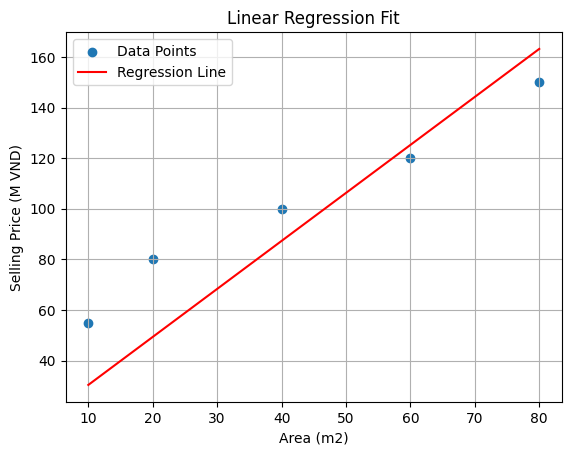

In [32]:
import matplotlib.pyplot as plt

plt.scatter(x_vals, y_vals, label='Data Points')

x_range = [min(x_vals), max(x_vals)]
y_pred_line = [w1 * x + w0 for x in x_range]
plt.plot(x_range, y_pred_line, color='red', label='Regression Line')

plt.xlabel('Area (m2)')
plt.ylabel('Selling Price (M VND)')
plt.title('Linear Regression Fit')
plt.legend()
plt.grid(True)
plt.show()